## First get authorized

Visit:
<br>
https://clarklab.uvarc.io/auth/login
<br>
And copy and paste access token below

In [5]:
token = 

## Using Transfer Service upload data with metadata

In [3]:
import requests 
import json
import FAIR

Upload a file to minio via the upload_file function.
<br>
<br>
upload_file takes:
        - file_path: path to local file 
        - metadata: describes the file to be uploaded
returns:
    - PID representing object
upload_file then calls the transfer service which uploads the file to minio and metadata to mongoDB and Stardog

In [51]:
dataset_meta = {
    "@context":{
        "@vocab":"http://schema.org/"
    },
    "@type":"Dataset",
    "name":"Raw Data",
    "description":"Heart Rate Measures from patient from admission to discharge.",
    "author":[
        {
            "name":"Justin Niestroy",
            "@id": "https://orcid.org/0000-0002-1103-3882",
            "affiliation":"University of Virginia"
        }
    ],
}
data_id = FAIR.upload_file('UVA_7129_HR2.csv',dataset_meta,token = token)
data_id

'ark:99999/6d32735f-f2bb-429c-8219-afec346126a4'

## Check MDS to make sure metadata was uploaded correctly

retrieve_metadata calls MDS to get the metadata for the newly minted id.
<br>
<br>
retrieve_metadata takes:
    - PID: identifier of interest
returns:
    - json-ld metadata of given PID

In [52]:
FAIR.retrieve_metadata(data_id,token = token)

{'@context': {'@vocab': 'http://schema.org/'},
 '@id': 'ark:99999/6d32735f-f2bb-429c-8219-afec346126a4',
 '@type': 'Dataset',
 'author': [{'@id': 'https://orcid.org/0000-0002-1103-3882',
   'affiliation': 'University of Virginia',
   'name': 'Justin Niestroy'}],
 'description': 'Heart Rate Measures from patient from admission to discharge.',
 'distribution': [{'@id': 'ark:99999/e4efca69-d46a-4c3d-b18d-cf7645ca56fb',
   '@type': 'DataDownload',
   'contentSize': 201072,
   'contentUrl': 'minio:9000/breakfast/UVA_7129_HR2.csv',
   'fileFormat': 'csv',
   'name': 'UVA_7129_HR2.csv'}],
 'name': 'Raw Data',
 'sdPublicationDate': '2020-08-08T16:26:48.487397224Z',
 'url': 'http://ors.uvadcos.io/ark:99999/6d32735f-f2bb-429c-8219-afec346126a4'}

## Upload Spark Script to run on newly uploaded data

In [53]:
spark_code_meta = {
    "@context":{
        "@vocab":"http://schema.org/"
    },
    "@type":"SoftwareSourceCode",
    "name":"Processing  Script",
    "description":"Sample Source Code for HCTSA test on spark",
    "author":[
        {
            "name":"Justin Niestroy",
            "@id": "https://orcid.org/0000-0002-1103-3882",
            "affiliation":"University of Virginia"
      }
    ]
}
software_id = FAIR.upload_file('run_algos.py',spark_code_meta,token = token)
software_id

'ark:99999/b062ed9e-6e0d-4901-9fd2-8e57ce09b451'

## Submit Spark Job Using Compute Service

Run a the uploaded script on the uploaded data by calling compute
<br>
<br>
FAIR.compute takes: 
    - data pid 
    - software pid
    - type of job ie spark,nipype,custom  
compute then launches kubernetes pods to run the given script on the provided data using specialized pods
<br>
<br>
compute returns:
    - job_PID 

In [57]:
job_id = FAIR.compute(data_id,software_id,'spark',token = token)
job_id

'ark:99999/3ec8da56-82a8-47d6-99e5-053ac7578712'

## Watch Running Job
list_running_jobs takes:
<br>
<br>
list_running_jobs returns:
    - list of running job PIDs

In [59]:
FAIR.list_running_jobs(token = token)

[]

## Get Job outputs from job metadata

Upon completion of a job the compute service updates the job id metadata to include properties:
    - evi:supports: list of output PIDs 
    - logs: logs from job

In [60]:
job_metadata = FAIR.retrieve_metadata(job_id,token = token)
output_ids = job_metadata.get('evi:supports')
output_ids

[{'@id': 'ark:99999/c0b0667b-857b-47c4-b221-d1170fcb90e1'},
 {'@id': 'ark:99999/18c2ff69-655d-4b08-ac93-6b9cb75646da'}]

The computation created 2 outputs
<br>
Metadata for the two created outputs is shown below

In [61]:
output_metadata = [ 
   FAIR.retrieve_metadata(out['@id'],token = token) for out in output_ids
]
output_metadata

[{'@context': {'@vocab': 'http://schema.org/'},
  '@id': 'ark:99999/c0b0667b-857b-47c4-b221-d1170fcb90e1',
  '@type': 'Dataset',
  'distribution': [{'@id': 'ark:99999/0a540941-0ec1-4f4b-a15f-a3cb58afa201',
    '@type': 'DataDownload',
    'contentUrl': 'minio:9000/breakfast/3ec8da56-82a8-47d6-99e5-053ac7578712/_SUCCESS',
    'fileFormat': '_SUCCESS',
    'name': '_SUCCESS'}],
  'evi:generatedBy': {'@id': 'ark:99999/3ec8da56-82a8-47d6-99e5-053ac7578712'},
  'name': '_SUCCESS',
  'sdPublicationDate': '2020-08-08T16:35:04.378778767Z',
  'url': 'http://ors.uvadcos.io/ark:99999/c0b0667b-857b-47c4-b221-d1170fcb90e1'},
 {'@context': {'@vocab': 'http://schema.org/'},
  '@id': 'ark:99999/18c2ff69-655d-4b08-ac93-6b9cb75646da',
  '@type': 'Dataset',
  'distribution': [{'@id': 'ark:99999/f2e74dbd-7773-4fd8-8a14-4fee223f8961',
    '@type': 'DataDownload',
    'contentUrl': 'minio:9000/breakfast/3ec8da56-82a8-47d6-99e5-053ac7578712/part-00000-75caba7f-9c0c-4339-99e6-57c2fa2c239c-c000.csv',
    'file

## Upload Image Code

In [62]:
spark_graphic_meta = {
    "@context":{
        "@vocab":"http://schema.org/"
    },
    "@type":"SoftwareSourceCode",
    "name":"Image Script",
    "description":"Creates heatmap of patients stay",
    "author":[
        {
            "name":"Justin Niestroy",
            "@id": "https://orcid.org/0000-0002-1103-3882",
            "affiliation":"University of Virginia"
      }
    ]
}
graphic_code_id = FAIR.upload_file('make_graphic.py',spark_graphic_meta,token = token)

## Run Spark Job to create Image

In [63]:
image_job_id = FAIR.compute(output_ids[1]['@id'],graphic_code_id,'spark',token = token)
image_job_id

'ark:99999/775c6f84-50f3-4966-ad9b-a7d986a4f29b'

## Check on running jobs

In [65]:
FAIR.list_running_jobs(token = token)

[]

### Get image ID from Updated Job ID

In [66]:
image_job_meta = FAIR.retrieve_metadata(image_job_id,token = token)
image_id = image_job_meta['evi:supports'][0]['@id']

## Get the image metadata

In [67]:
FAIR.retrieve_metadata(image_id,token = token)

{'@context': {'@vocab': 'http://schema.org/'},
 '@id': 'ark:99999/4a215dec-dc87-4381-8fdd-c62120ed8280',
 '@type': 'Dataset',
 'distribution': [{'@id': 'ark:99999/3b3c0c70-e9da-4cb9-b9dc-168fe2d92a2f',
   '@type': 'DataDownload',
   'contentUrl': 'minio:9000/breakfast/775c6f84-50f3-4966-ad9b-a7d986a4f29b/Histogram_Heatmap.png',
   'fileFormat': 'png',
   'name': 'Histogram_Heatmap.png'}],
 'evi:generatedBy': {'@id': 'ark:99999/775c6f84-50f3-4966-ad9b-a7d986a4f29b'},
 'name': 'Histogram_Heatmap.png',
 'sdPublicationDate': '2020-08-08T16:36:08.634414759Z',
 'url': 'http://ors.uvadcos.io/ark:99999/4a215dec-dc87-4381-8fdd-c62120ed8280'}

### Build Evidence graph of created image using the evidence graph service

Evidence Graph Service builds an json-ld evidence graph representing the provenance (datasets, software, and computations that support the PID)
<br>
<br>
evidence_graph takes:
    - PID
evidence_graph returns:
    - json-ld evidence graph for given PID

In [6]:
FAIR.evidence_graph(image_id,token = token)

{'@context': {'@vocab': 'http://schema.org/', 'evi': 'http://w3id.org/EVI#'},
 '@id': 'ark:99999/4a215dec-dc87-4381-8fdd-c62120ed8280',
 '@type': 'Dataset',
 'evi:generatedBy': {'@id': 'ark:99999/775c6f84-50f3-4966-ad9b-a7d986a4f29b',
  '@type': 'evi:Computation',
  'evi:usedDataset': {'@id': 'ark:99999/18c2ff69-655d-4b08-ac93-6b9cb75646da',
   '@type': 'Dataset',
   'evi:generatedBy': {'@id': 'ark:99999/3ec8da56-82a8-47d6-99e5-053ac7578712',
    '@type': 'evi:Computation',
    'evi:usedDataset': {'@id': 'ark:99999/6d32735f-f2bb-429c-8219-afec346126a4',
     '@type': 'Dataset',
     'author': {'@id': 'https://orcid.org/0000-0002-1103-3882',
      '@type': 'Person',
      'name': 'Justin Niestroy'},
     'name': 'Raw Data'},
    'evi:usedSoftware': {'@id': 'ark:99999/b062ed9e-6e0d-4901-9fd2-8e57ce09b451',
     '@type': 'SoftwareSourceCode',
     'author': {'@id': 'https://orcid.org/0000-0002-1103-3882',
      '@type': 'Person',
      'name': 'Justin Niestroy'},
     'name': 'Processing 

## View Visualization of the Evidence Graph

In [19]:
'https://clarklab.uvarc.io/viz/' + image_id

'https://clarklab.uvarc.io/viz/ark:99999/fda9dcaa-2baf-4b2c-a7a5-c37867abbf6b'

## Download Created Image

Download output files from computations using download_file
<br>
<br>
download_file takes:
    - PID: id representing object to be downloaded
    - name: file name for downloaded object
<br>
download_file returns:<br>
         - bool: True if download if succesful<br>
         - file saved location given

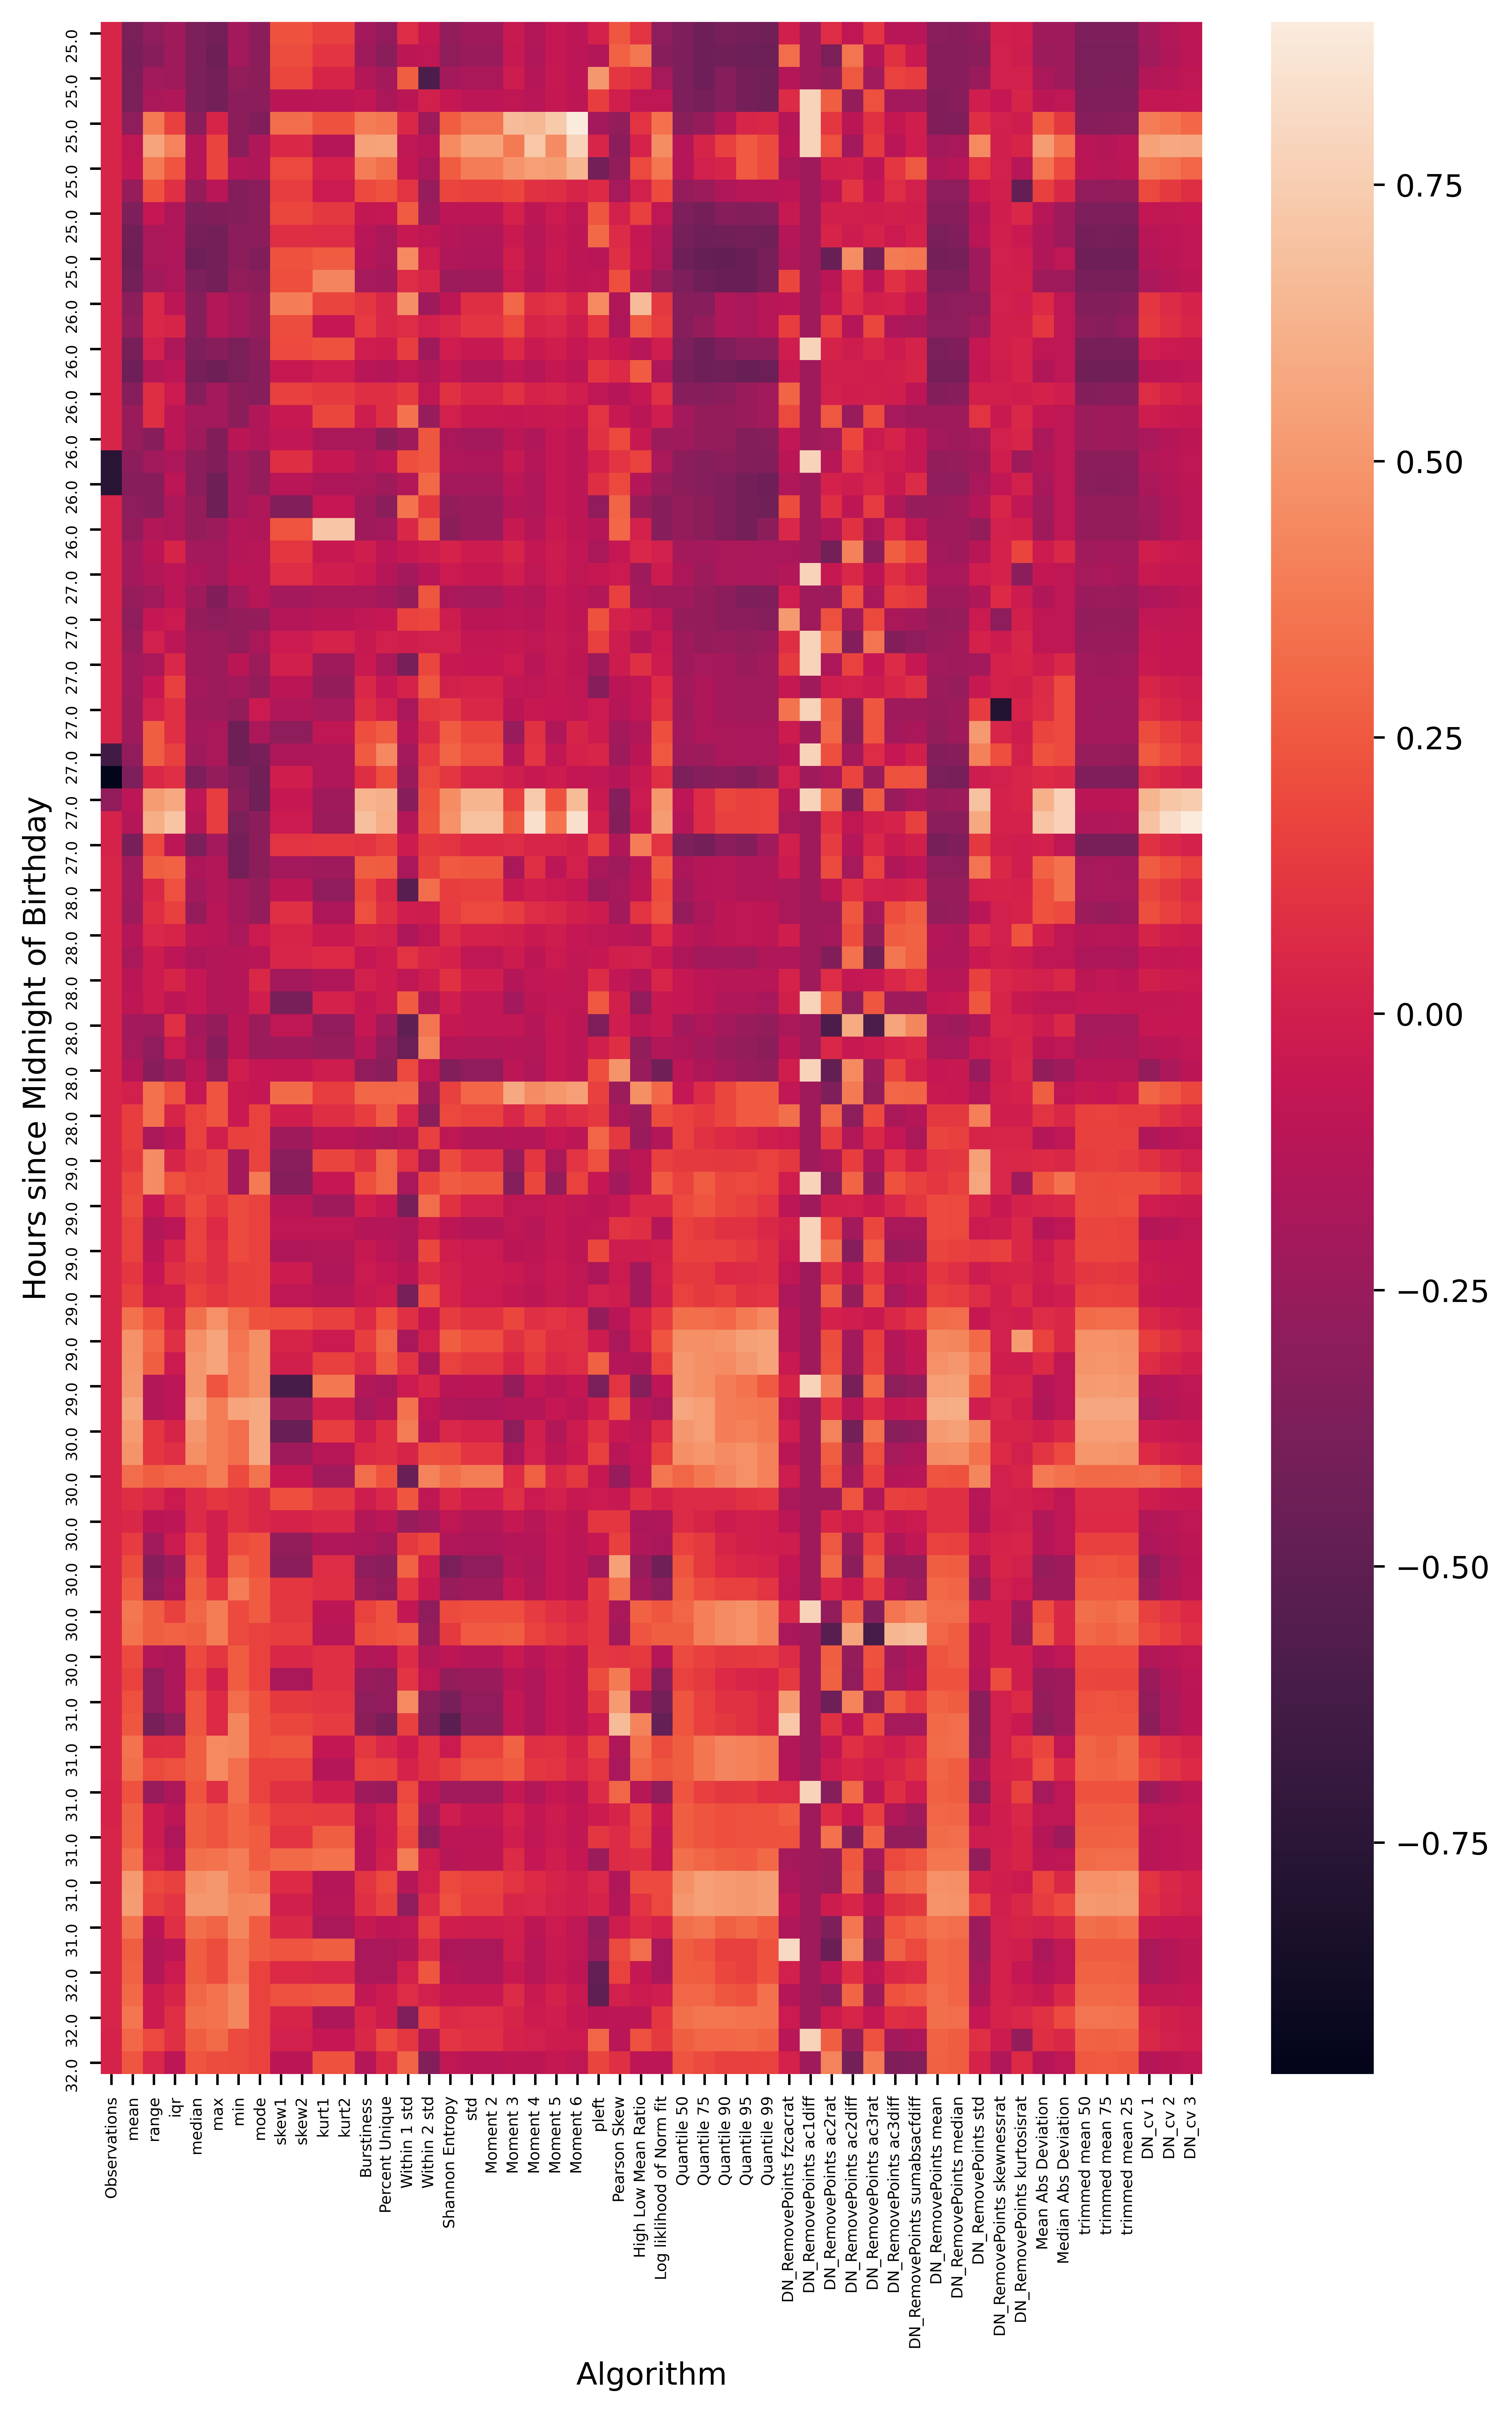

In [70]:
from IPython.display import Image
FAIR.download_file(image_id,'Created Image.png',token = token)
Image(filename='Created Image.png') 